In [1]:
import numpy as np

In [44]:
arr=np.random.randn(1000)
marks=arr*10+60

In [40]:
import matplotlib.pyplot as plt

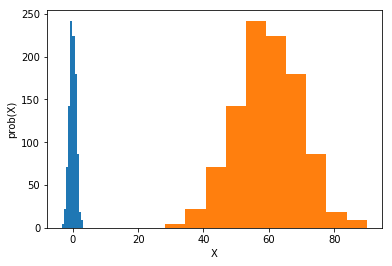

In [47]:
plt.hist(arr,bins=10)
plt.hist(marks,bins=10)
plt.xlabel("X")
plt.ylabel("prob(X)")
plt.show()

In [42]:
np.mean(arr)

59.9813080534802

In [43]:
np.std(arr)

9.697911583602613

# Multivariate Normal Distribution

In [153]:
a_data=np.random.multivariate_normal(mean=[5,7],cov=[[1,0.5],[0.5,1]],size=1000)
o_data=np.random.multivariate_normal(mean=[10,12],cov=[[2,-1.5],[-1.5,1]],size=1000)

/home/chirag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


In [204]:
#print(a_data)
a_data

array([[5.01602567, 5.59437798],
       [6.49040421, 8.39330844],
       [5.41317195, 7.00602694],
       ...,
       [5.05228159, 6.91995767],
       [6.81147781, 7.98252319],
       [4.01714869, 4.91361936]])

In [155]:
#plt.plot(a_data[:,0],a_data[:,1])

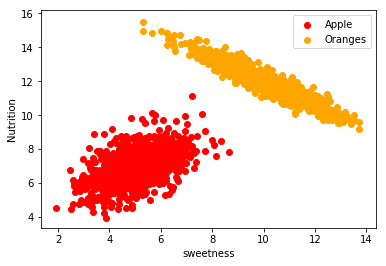

In [156]:
plt.scatter(a_data[:,0],a_data[:,1],color='red',label="Apple")
plt.scatter(o_data[:,0],o_data[:,1],color="orange",label="Oranges")
plt.xlabel('sweetness')
plt.ylabel('Nutrition')
plt.legend()
plt.show()


# Classification using K nearest Neighbours

In [157]:
total_fruits=a_data.shape[0]+o_data.shape[0]

In [158]:
print(total_fruits)

2000


In [159]:
X=np.zeros((total_fruits,3))

In [160]:
X.shape

(2000, 3)

In [161]:
X[:1000,:-1]=a_data
X[1000:,:-1]=o_data
X[:1000,-1]=1

In [162]:
X_values=X[:,:-1]
Y_values=X[:,-1]

In [163]:
print(X_values.shape)
print(Y_values.shape)

(2000, 2)
(2000,)


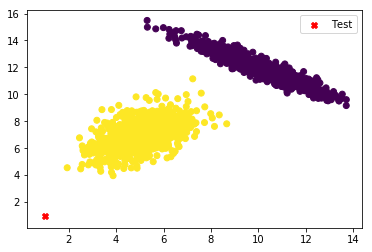

In [197]:
plt.scatter(X_values[:,0],X_values[:,1],c=Y_values)
plt.scatter(test_fruit[0],test_fruit[1],c='red',marker='X',label='Test')
plt.legend()

In [198]:
test_fruit=np.array([1,1])

In [199]:
#Take Distance of K nearest Neighbours from X
def distance(p1,p2):
    return np.sum((p1-p2)**2)**0.5

In [200]:
def knn(X,Y,test,k=5):
    m=X.shape[0]#2000
    d=[]
    for i in range(m):
        dist=distance(test,X[i])#Calculating distance of every element
        d.append((dist,Y[i]))   #created a tuple of distance and labels
    sorted(d)                   #sorted them on basis of distance
    d=np.array(sorted(d))[:,1]  #created another tuple of labels only
    d=d[:k]                     #displayed till k=5
    t=np.unique(d,return_counts=True)# returns two lists one containg labels and other containing there freq.
    idx=np.argmax(t[1])              #Takes the highest values from freq. array
    pred=int(t[0][idx])             #Takes the prediction
    if pred==0:
        return "Apple"
    else:
        return "Orange"

In [201]:
knn(X_values,Y_values,test_fruit,k=5)


'Orange'